<a href="https://colab.research.google.com/github/MM21B038/Falcon9-Success-Landing-Prediction/blob/master/Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis and Prediction

## Importing Libraries





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
df = pd.read_csv('SpaceX_Falcon9_usable_data.csv')

In [ ]:
df.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Data Preprocessing

In [ ]:
data = df[['PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Class']]

In [ ]:
data

,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Class
0,NaN,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003,0
1,525.0,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005,0
2,677.0,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007,0
3,500.0,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003,0
4,3170.0,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004,0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,15600.0,VLEO,KSC LC 39A,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,1
86,15600.0,VLEO,KSC LC 39A,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,1
87,15600.0,VLEO,KSC LC 39A,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,1
88,15600.0,VLEO,CCSFS SLC 40,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,1


In [ ]:
mean = data['PayloadMass'].mean()
mean

6123.547647058824

In [ ]:
data['PayloadMass'].fillna(mean, inplace=True)
data['LandingPad'].fillna('Unknown', inplace=True)

<ipython-input-7-f512a0518e20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PayloadMass'].fillna(mean, inplace=True)
<ipython-input-7-f512a0518e20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LandingPad'].fillna('Unknown', inplace=True)


In [ ]:
data.head()

,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Class
0,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B0003,0
1,525.000000,LEO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B0005,0
2,677.000000,ISS,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B0007,0
3,500.000000,PO,VAFB SLC 4E,1,False,False,False,Unknown,1.0,0,B1003,0
4,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B1004,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  90 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   90 non-null     object 
 3   Flights      90 non-null     int64  
 4   GridFins     90 non-null     bool   
 5   Reused       90 non-null     bool   
 6   Legs         90 non-null     bool   
 7   LandingPad   90 non-null     object 
 8   Block        90 non-null     float64
 9   ReusedCount  90 non-null     int64  
 10  Serial       90 non-null     object 
 11  Class        90 non-null     int64  
dtypes: bool(3), float64(2), int64(3), object(4)
memory usage: 6.7+ KB


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd # Make sure pandas is imported

columns_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), columns_to_encode)
    ],
    remainder='passthrough'
)

X = ct.fit_transform(data)

# Check the shape of X to confirm it matches the expected number of features
print("Shape of X:", X.shape)

feature_names = ct.get_feature_names_out()

# Check the length of feature_names to confirm it matches the number of columns in X
print("Number of feature names:", len(feature_names))

data_transformed = pd.DataFrame(X.toarray(), columns=feature_names) # Convert sparse matrix to dense array

data_transformed

Shape of X: (90, 81)
Number of feature names: 81


,encoder__Orbit_ES-L1,encoder__Orbit_GEO,encoder__Orbit_GTO,encoder__Orbit_HEO,encoder__Orbit_ISS,encoder__Orbit_LEO,encoder__Orbit_MEO,encoder__Orbit_PO,encoder__Orbit_SO,encoder__Orbit_SSO,...,encoder__Serial_B1060,encoder__Serial_B1062,remainder__PayloadMass,remainder__Flights,remainder__GridFins,remainder__Reused,remainder__Legs,remainder__Block,remainder__ReusedCount,remainder__Class
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,1.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,1.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,1.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,1.0


In [ ]:
X = data_transformed.iloc[:, :-1].values
y = data_transformed.iloc[:, -1].values

In [ ]:
print(y)

[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Importing Machine Learning, Deep Learning, Data Transforming Libraries

In [ ]:
result = {
    'Model': [],
    'Accuracy': []
}

### Spliting data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print(score)
print(matrix)

0.8333333333333334
[[ 3  1]
 [ 2 12]]


In [ ]:
result['Model'].append('Logistic Regression')
result['Accuracy'].append(score)

### SVC

In [ ]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print(score)
print(matrix)

0.8888888888888888
[[ 3  1]
 [ 1 13]]


In [ ]:
result['Model'].append('SVC')
result['Accuracy'].append(score)

### Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print(score)
print(matrix)

0.8333333333333334
[[ 3  1]
 [ 2 12]]


In [ ]:
result['Model'].append('Decision Tree Classifier')
result['Accuracy'].append(score)

### Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print(score)
print(matrix)

0.8888888888888888
[[ 3  1]
 [ 1 13]]


In [ ]:
result['Model'].append('Random Forest')
result['Accuracy'].append(score)

### K Neighbours

In [ ]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print(score)
print(matrix)

0.8888888888888888
[[ 2  2]
 [ 0 14]]


In [ ]:
result['Model'].append('K Neighbours')
result['Accuracy'].append(score)

### GaussianNB

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print(score)
print(matrix)

0.7777777777777778
[[ 4  0]
 [ 4 10]]


In [ ]:
result['Model'].append('GaussianNB')
result['Accuracy'].append(score)

### XGB Classifier

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print(score)
print(matrix)

0.9444444444444444
[[ 4  0]
 [ 1 13]]


In [ ]:
result['Model'].append('XGB Classifier')
result['Accuracy'].append(score)

### Artificial Neural Network

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3681 - loss: 0.8432
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3251 - loss: 0.8487  
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3720 - loss: 0.7871 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3859 - loss: 0.7899 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4171 - loss: 0.7453 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4201 - loss: 0.7375  
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4232 - loss: 0.7460  
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4262 - loss: 0.7400
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4036 - loss: 0.7221  
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4332 - loss: 0.7156  
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4852 - loss: 0.7014 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.499

In [ ]:
ann.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.7778 - loss: 0.4935


[0.4935477674007416, 0.7777777910232544]

In [ ]:
ann_pred = ann.predict(x_test)
ann_pred = (ann_pred > 0.5)
score = accuracy_score(y_test, ann_pred)
matrix = confusion_matrix(y_test, ann_pred)
print(score)
print(matrix)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
0.7777777777777778
[[ 3  1]
 [ 3 11]]


In [ ]:
result['Model'].append('ANN')
result['Accuracy'].append(score)

## Comparing Result

In [ ]:
result = pd.DataFrame(result)

In [ ]:
result.to_csv('result.csv', index=True)
result

,Model,Accuracy
0,Logistic Regression,0.833333
1,SVC,0.888889
2,Decision Tree Classifier,0.833333
3,Random Forest,0.888889
4,K Neighbours,0.888889
5,GaussianNB,0.777778
6,XGB Classifier,0.944444
7,ANN,0.777778


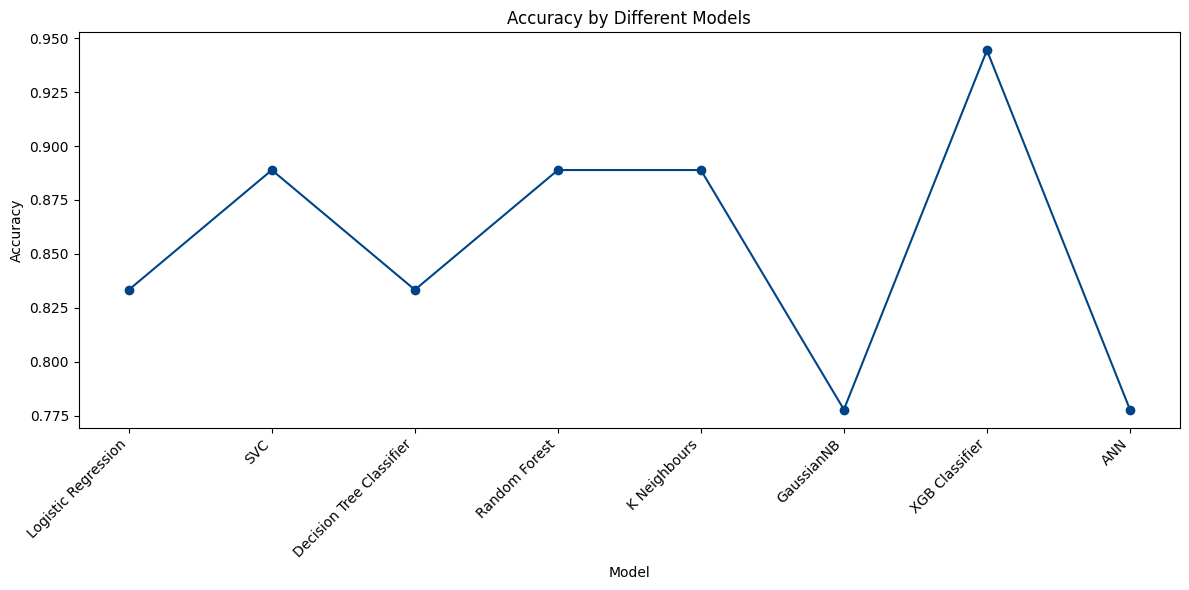

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(result['Model'], result['Accuracy'], marker='o', linestyle='-', color='#004488')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy by Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('accuracy_by_model.png')
plt.show()

## Best Model

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print(score)

0.9444444444444444


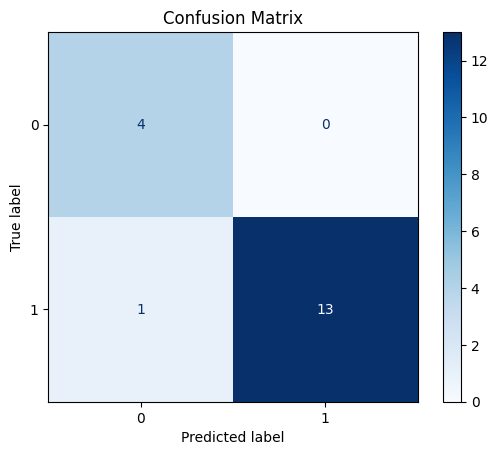

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

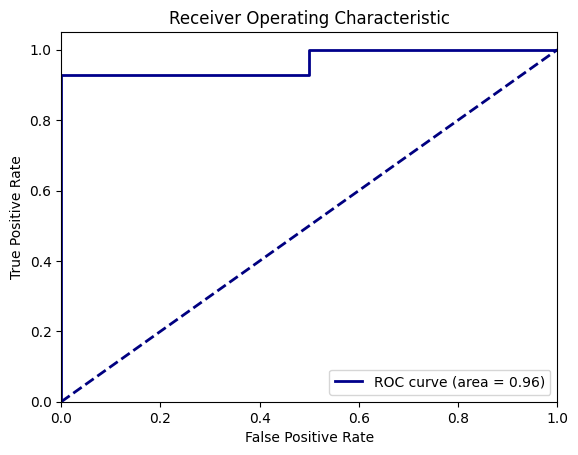

In [ ]:
# Assuming 'model' is your trained XGBoost model and 'x_test', 'y_test' are your test data
y_pred_proba = model.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
plt.show()

## Data Visualization

In [ ]:
data.head()

,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Class
0,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B0003,0
1,525.000000,LEO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B0005,0
2,677.000000,ISS,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B0007,0
3,500.000000,PO,VAFB SLC 4E,1,False,False,False,Unknown,1.0,0,B1003,0
4,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B1004,0


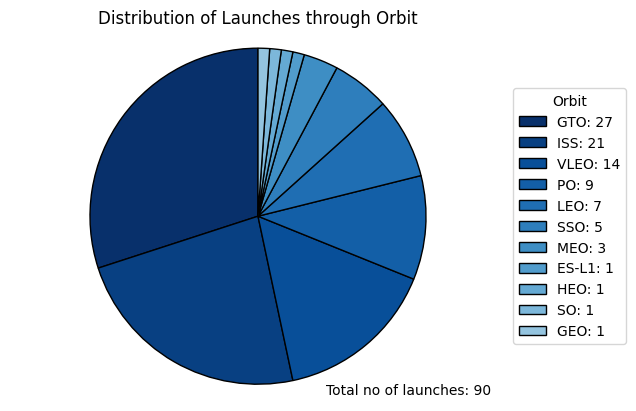

In [ ]:
launchsite_counts = data['Orbit'].value_counts()
total_launches = launchsite_counts.sum()
orbit_counts = data['Orbit'].value_counts()
colors = plt.cm.Blues(np.linspace(1, 0.4, len(orbit_counts)))
plt.pie(orbit_counts, labels=None, colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.text(0.97, 0.01, f'Total no of launches: {total_launches}', ha='right', va='bottom', transform=plt.gca().transAxes)
legend_labels = [f'{site}: {count}' for site, count in launchsite_counts.items()]
plt.legend(legend_labels, title='Orbit', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Launches through Orbit')
plt.axis('equal')
plt.savefig('orbit_distribution.png')
plt.show()

<Figure size 800x1200 with 0 Axes>

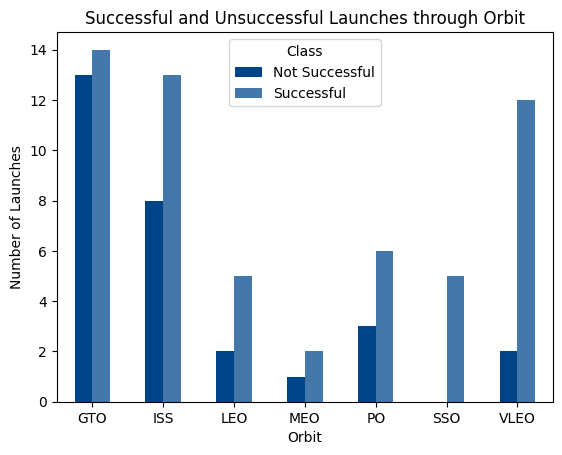

In [ ]:
# Filter the DataFrame for the desired orbits
filtered_data = data[data['Orbit'].isin(['GTO', 'ISS', 'VLEO', 'PO', 'LEO', 'SSO', 'MEO'])]

# Group the filtered data by Orbit and Class, and count the occurrences
grouped_data = filtered_data.groupby(['Orbit', 'Class']).size().unstack(fill_value=0)

# Plot the bar graph
plt.figure(figsize=(8, 12))
grouped_data.plot(kind='bar', color=['#004488', '#4477AA'])  # Dark blue for successful, normal blue for not successful
plt.xlabel('Orbit')
plt.ylabel('Number of Launches')
plt.title('Successful and Unsuccessful Launches through Orbit')
plt.legend(title='Class', labels=['Not Successful', 'Successful'])
plt.xticks(rotation=0)
plt.savefig('orbit_launch_success.png')
plt.show()


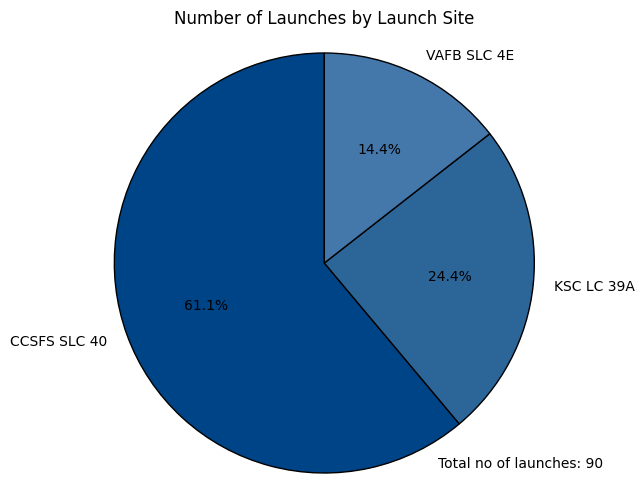

In [ ]:
# Group the data by 'LaunchSite' and count the number of launches for each site
launchsite_counts = data['LaunchSite'].value_counts()

# Calculate the total number of launches
total_launches = launchsite_counts.sum()

# Define colors for the pie chart
colors = ['#004488', '#2C6699', '#4477AA']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(launchsite_counts, labels=launchsite_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Set title
plt.title('Number of Launches by Launch Site')

# Add the total number of launches to the lower right corner
plt.text(0.95, 0.05, f'Total no of launches: {total_launches}', ha='right', va='bottom', transform=plt.gca().transAxes)

# Ensure the circle's proportion
plt.axis('equal')
plt.savefig('launch_site_distribution.png')
plt.show()

<Figure size 1000x800 with 0 Axes>

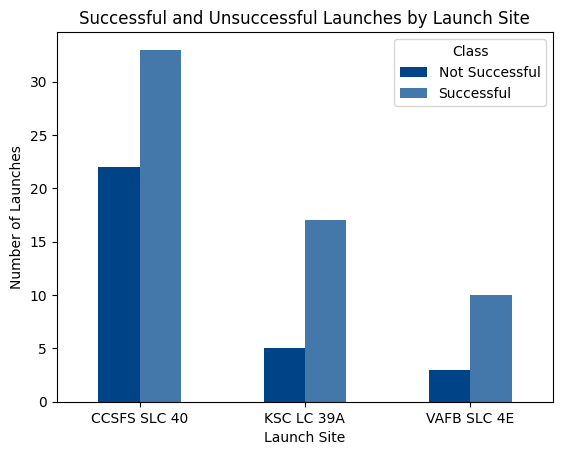

In [ ]:
# Filter the DataFrame for the desired LaunchSites
filtered_data = data

# Group the filtered data by LaunchSite and Class, and count the occurrences
grouped_data = filtered_data.groupby(['LaunchSite', 'Class']).size().unstack(fill_value=0)

# Plot the bar graph
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
grouped_data.plot(kind='bar', color=['#004488', '#4477AA'])  # Dark blue for successful, normal blue for not successful
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.title('Successful and Unsuccessful Launches by Launch Site')
plt.legend(title='Class', labels=['Not Successful', 'Successful'])
plt.xticks(rotation=0)
plt.savefig('launch_site_launch_success.png')
plt.show()

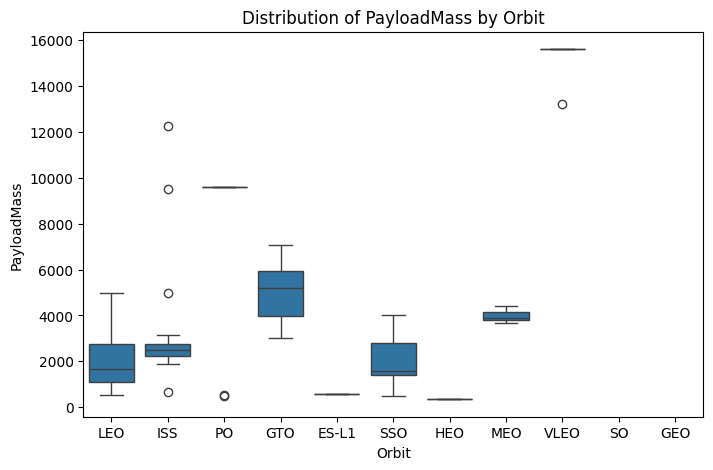

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Orbit', y='PayloadMass')
plt.title('Distribution of PayloadMass by Orbit')
plt.xlabel('Orbit')
plt.ylabel('PayloadMass')
plt.savefig('payload_mass_by_orbit.png')
plt.show()

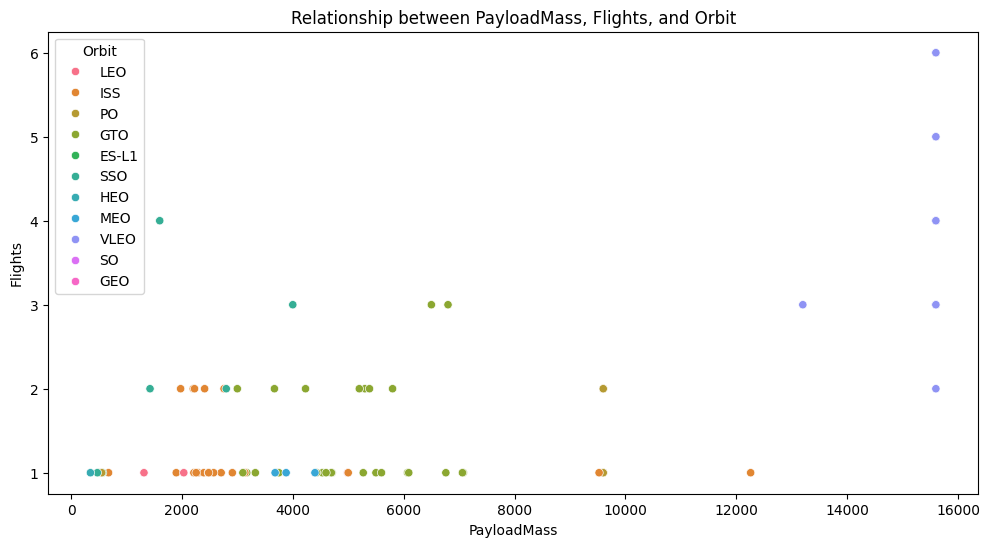

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PayloadMass', y='Flights', hue='Orbit')
plt.title('Relationship between PayloadMass, Flights, and Orbit')
plt.xlabel('PayloadMass')
plt.ylabel('Flights')
plt.savefig('payload_mass_flights_orbit.png')
plt.show()

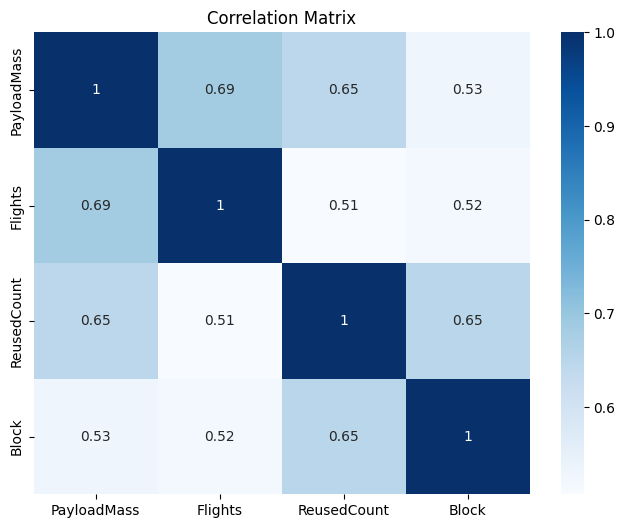

In [ ]:
# Heatmap: Correlation between numerical variables
numerical_vars = ['PayloadMass', 'Flights', 'ReusedCount', 'Block']
corr_matrix = df[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()